## Titanic Machine Learning Competition, from Kaggle.

#### ETAPES DU PROJET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Train set

trainset = pd.read_csv('train.csv')
trainset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Test set

testset = pd.read_csv('test.csv')
testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1- Exploratory Data Analysis

In [4]:
trainset.shape

(891, 12)

In [5]:
testset.shape

(418, 11)

#### Variable Target = 'Survived'

#### * Shape (Lignes et Colonnes)

In [6]:
trainset.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [7]:
testset.dtypes.value_counts()

object     5
int64      4
float64    2
Name: count, dtype: int64

#### * Valeurs manquantes

In [8]:
trainset.isna().sum() / trainset.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
testset.isna().sum() / testset.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [10]:
# supprimer les colonnes dont le pourcentage de valeurs manquantes est supérieur à 10%

In [11]:
missing_values_train = trainset.isna().sum() / trainset.shape[0]
missing_values_test = testset.isna().sum() / testset.shape[0]

In [12]:
trainset = trainset[trainset.columns[missing_values_train < 0.10]]

In [13]:
trainset.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [14]:
testset = testset[testset.columns[missing_values_test < 0.10]]
testset.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S


## 2- Preprocessing

#### Vérifier les variables catégorielles

In [15]:
# Enlever la variable Name
trainset.drop('Name', axis = 1, inplace = True)
testset.drop('Name', axis = 1, inplace = True)

In [16]:
# Enlever la variable Ticket
trainset.drop('Ticket', axis = 1, inplace = True)
testset.drop('Ticket', axis = 1, inplace = True)

In [17]:
for col in trainset.select_dtypes('object'):
    print(f'{col :-<50} {trainset[col].unique()}')

Sex----------------------------------------------- ['male' 'female']
Embarked------------------------------------------ ['S' 'C' 'Q' nan]


In [18]:
# Encodage

def encodage(df):
    code = {
        'male':0,
        'female':1,
        'S':0,
        'C':1,
        'Q':2
    }

    for col in df.select_dtypes('object'):
        df.loc[:, col] = df[col].map(code)

    return(df)

In [19]:
trainset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [20]:
testset.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [21]:
# Fonction de preprocessing

def preprocess(df):
    df = encodage(df)

    return (df)

In [22]:
trainset = preprocess(trainset)
testset = preprocess(testset)

In [23]:
X_train = trainset.drop('Survived', axis = 1)
y_train = trainset['Survived']
X_test = testset

In [24]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv = 4, scoring = 'f1',
                                              train_sizes = np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 10))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'val score')
    plt.legend()
    
    return (y_pred)    

## 3- Modelling

In [25]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.impute import KNNImputer

In [26]:
preprocessor = make_pipeline(KNNImputer(n_neighbors = 2), PolynomialFeatures(2, include_bias = False), SelectKBest(f_classif, k = 10))

In [27]:
# Ici, je vais utiliser 3 modèles (SVM, Randam forest, KNN et AdaBoost)

RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state = 0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state = 0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state = 0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [28]:
list_of_models = {
    'RandomForest': RandomForest,
    'AdaBoost': AdaBoost,
    'SVM': SVM,
    'KNN': KNN
}

RandomForest
AdaBoost
SVM
KNN


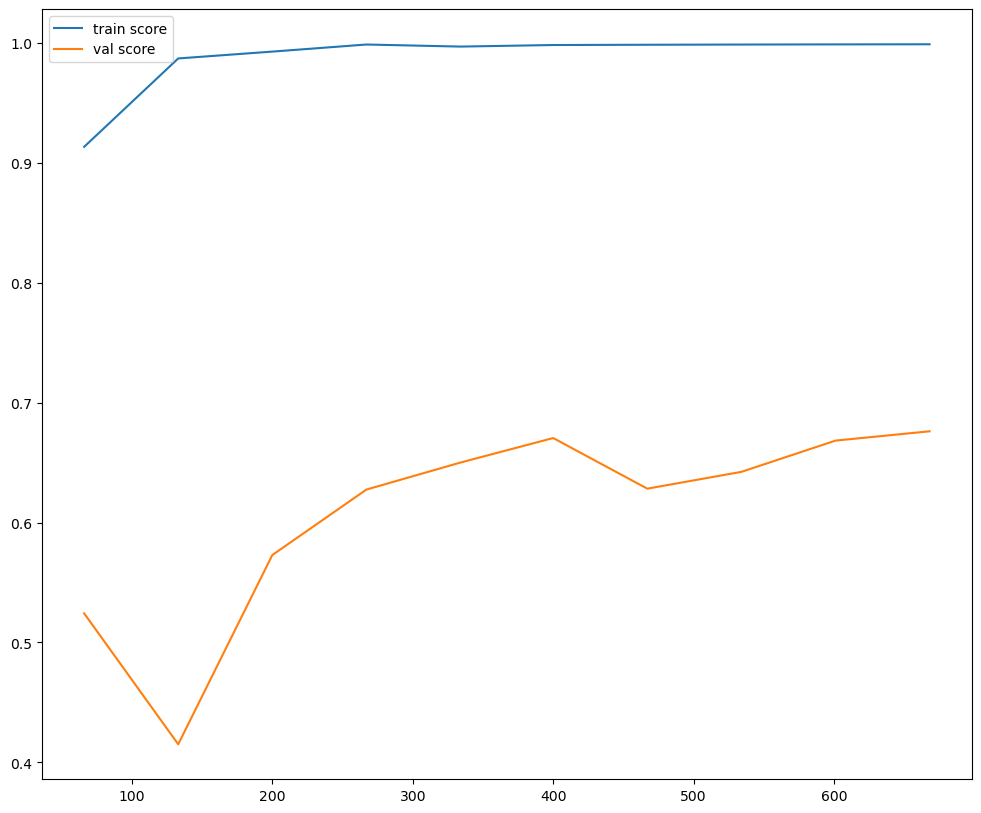

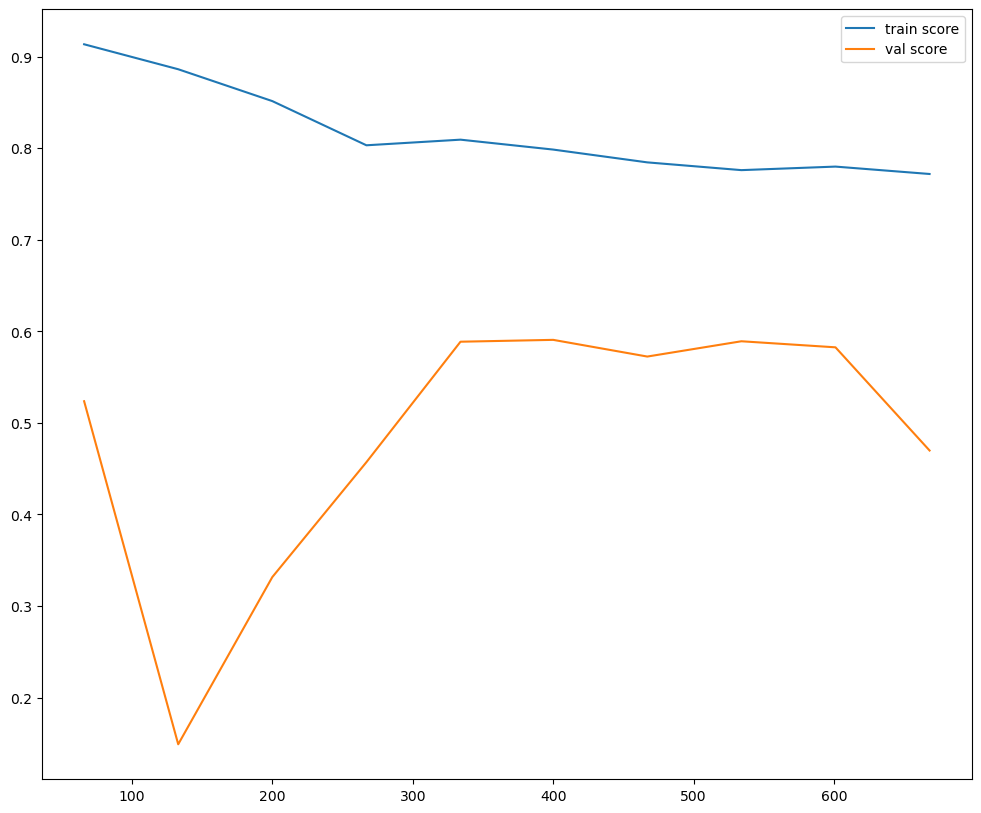

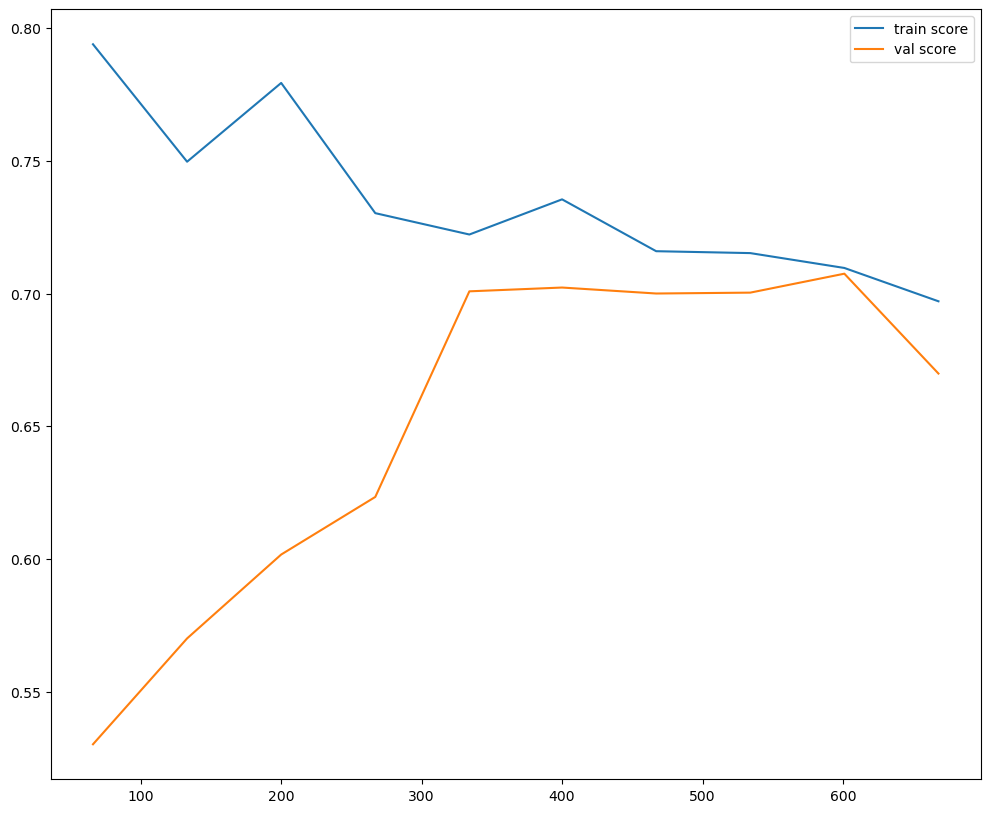

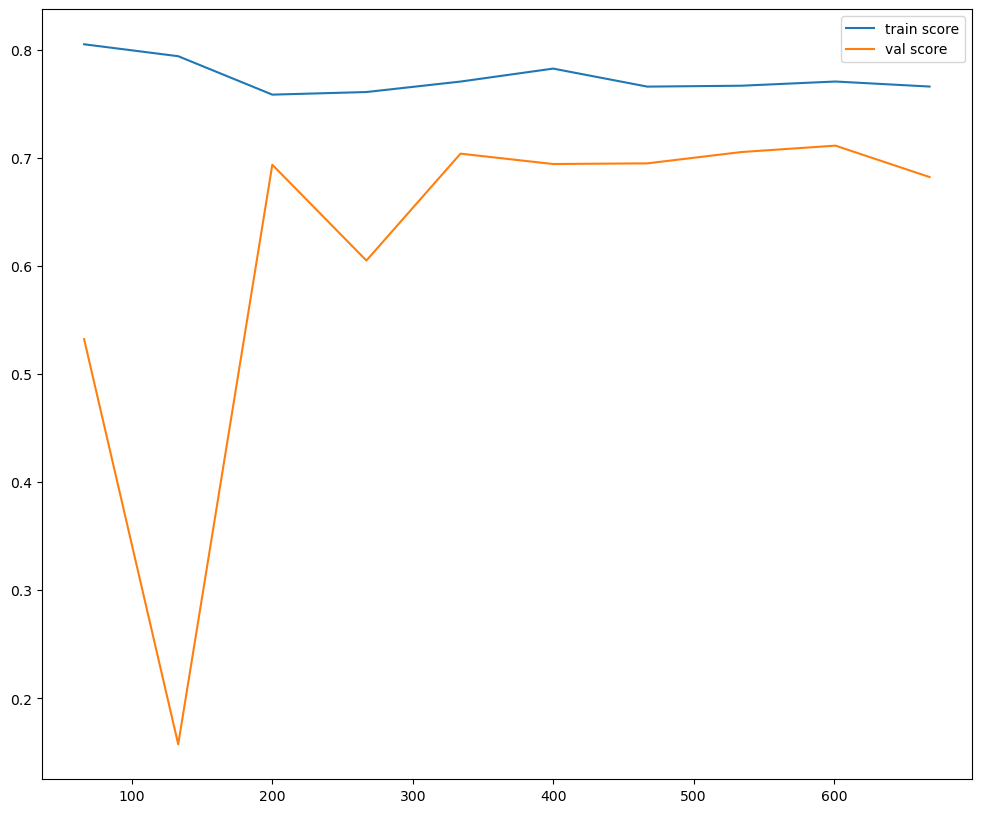

In [29]:
for model_name, model in list_of_models.items():
    print(model_name)
    evaluation(model)

## Optimisation

In [30]:
# Je vais utiliser GridSearchCv pour optimiser le modèle RandomForest

In [31]:
RandomForest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('knnimputer', KNNImputer(n_neighbors=2)),
                                 ('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [33]:
params_grid = {
    'pipeline__polynomialfeatures__degree': [2, 3, 4],
    'pipeline__selectkbest__k' : range(40, 60),
    
    'randomforestclassifier__max_depth':[3,5,10,None],
    'randomforestclassifier__n_estimators':[10,100,200],
    'randomforestclassifier__max_features':[1,3,5,7],
    'randomforestclassifier__min_samples_leaf':[1,2,3],
    'randomforestclassifier__min_samples_split':[1,2,3]
}

In [34]:
# grid = GridSearchCV(RandomForest, params_grid, cv=4, scoring='accuracy', n_jobs=-1)

In [35]:
random = RandomizedSearchCV(RandomForest, params_grid, cv=4, scoring='accuracy', n_iter = 10, random_state = 0)

In [36]:
# grid.fit(X_train, y_train)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('knnimputer',
                                                               KNNImputer(n_neighbors=2)),
                                                              ('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest())])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=0))]),
                   param_distributions={'pipeline__polynomialfeatures__degree': [2,
                                                                                 3,
                                                                                 4],
                                        'pipeline__selectkbest__k': range(40, 60),
                                        'randomforestclassifier__max_depth': [3,
                                                                              5,
                                                                              10,
                                                                              None],
                                        'randomforestclassifier__max_features': [1,
                                                                                 3,
                                                                                 5,
                                                                                 7],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     3],
                                        'randomforestclassifier__min_samples_split': [1,
                                                                                      2,
                                                                                      3],
                                        'randomforestclassifier__n_estimators': [10,
                                                                                 100,
                                                                                 200]},
                   random_state=0, scoring='accuracy')

In [37]:
# print(grid.best_params_)
print(random.best_params_)

{'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 1, 'randomforestclassifier__max_depth': None, 'pipeline__selectkbest__k': 42, 'pipeline__polynomialfeatures__degree': 3}


In [38]:
# model = grid.best_estimator_
model = random.best_estimator_

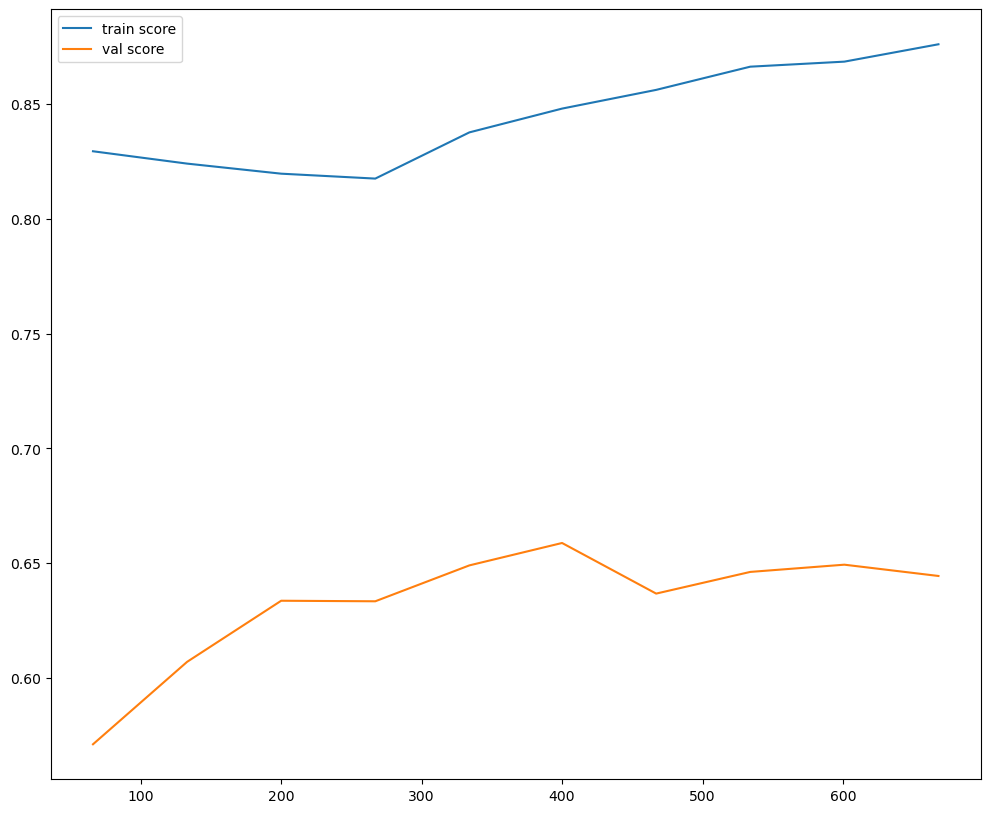

In [39]:
y_pred = evaluation(model)

In [40]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
sub_df = pd.DataFrame({
    'PassengerId': X_test['PassengerId'],
    'Survived' : y_pred})

In [55]:
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [56]:
# Upload the result to a csv file

sub_df.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [57]:
import shutil

# Replace 'your_local_download_path' with the desired local download path
download_path = 'C:/Users/Florian AGBODJI/Downloads/submission.csv'

# Move the file to the desired download location
shutil.move('submission.csv', download_path)


'C:/Users/Florian AGBODJI/Downloads/submission.csv'